In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.stats.proportion import proportions_ztest

In [3]:
ab_data = pd.read_csv('ab_data_tourist.csv')
ab_data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


In [4]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


In [5]:

gh = pd.DataFrame({'a':[1,2,3,4,5,6]})

In [6]:
from datetime import datetime
ab_data['date'] = pd.to_datetime(ab_data['date'],format='%Y-%m-%d')
ab_data

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000
...,...,...,...,...,...
294473,751197,2021-01-03,A,0,0
294474,945152,2021-01-12,A,0,0
294475,734608,2021-01-22,A,0,0
294476,697314,2021-01-15,A,0,0


In [7]:
ab_data.sort_values(by='date',ignore_index=True,inplace=True)

In [8]:
a_data = ab_data[ab_data['group']=='A'].reset_index().drop('index',axis=1)
b_data = ab_data[ab_data['group']=='B'].reset_index().drop('index',axis=1)

In [9]:
a_data.shape

(147202, 5)

In [10]:
print('количество дней шло тестирование в группе А : {}'.format(a_data['date'].nunique()))
print('количество дней шло тестирование в группе B : {}'.format(b_data['date'].nunique()))

print('начало в группе А: {}, конец : {} '.format(a_data['date'].min(),a_data['date'].max()))
print('начало в группе B: {}, конец : {} '.format(b_data['date'].min(),b_data['date'].max()))

количество дней шло тестирование в группе А : 23
количество дней шло тестирование в группе B : 23
начало в группе А: 2021-01-02 00:00:00, конец : 2021-01-24 00:00:00 
начало в группе B: 2021-01-02 00:00:00, конец : 2021-01-24 00:00:00 


Понимаем, что даты и время проведения тестирования одинаковые.

In [12]:
lst_interception = list(set(a_data['user_id']).intersection(set(b_data['user_id'])))
len(lst_interception)

1895

Удаляем всех пользователей, которые попали в обе группы.

In [379]:
a_data = a_data[~a_data['user_id'].isin(lst_interception )]
b_data = b_data[~b_data['user_id'].isin(lst_interception )]

In [380]:
n_A = a_data.shape[0]
n_B = b_data.shape[0] 


print('Количество посещений сайта в группе А: {}'.format(n_A))
print('Количество посещений сайта в группе B: {}'.format(n_B))

Количество посещений сайта в группе А: 145307
Количество посещений сайта в группе B: 145381


In [381]:
a_data.head()

,user_id,date,group,purchase,price
0,659091,2021-01-02,A,0,0
1,810044,2021-01-02,A,0,0
2,638214,2021-01-02,A,0,0
3,934736,2021-01-02,A,0,0
4,632934,2021-01-02,A,0,0


In [382]:

mask_a = a_data.groupby('group')[['user_id','purchase','price']
                        ].agg(func={'user_id':'count','purchase':'sum','price':'sum'}
                              ).reset_index().rename(columns={'user_id':'count','purchase':'total_purchase','price':'sum_purchase'})
print('группа А')
mask_a

группа А


,group,count,total_purchase,sum_purchase
0,A,145307,17487,1417780000


In [383]:

mask_b = b_data.groupby('group')[['user_id','purchase','price']
                        ].agg(func={'user_id':'count','purchase':'sum','price':'sum'}
                              ).reset_index().rename(columns={'user_id':'count','purchase':'total_purchase','price':'sum_purchase'})
print('группа B')
mask_b

группа B


,group,count,total_purchase,sum_purchase
0,B,145381,17290,1533010000


Две группы соизмеримы, примерно одиннаковые, даже по показателям практические схожи. Группы сбалансированы.

In [384]:
# Найдем конверсию и средний чек для каждой группы

mask_a['conversion'] = mask_a['total_purchase']/mask_a['count']
mask_a['mean_check'] = mask_a['sum_purchase']/mask_a['total_purchase']
mask_a

,group,count,total_purchase,sum_purchase,conversion,mean_check
0,A,145307,17487,1417780000,0.120345,81076.228055


In [385]:
mask_b['conversion'] = mask_b['total_purchase']/mask_b['count']
mask_b['mean_check'] = mask_b['sum_purchase']/mask_b['total_purchase']
mask_b

,group,count,total_purchase,sum_purchase,conversion,mean_check
0,B,145381,17290,1533010000,0.118929,88664.54598


Судя по данным показателям, средний чек и конверсия, В первом варианте просматривается лидерство по показателю конверсия, а во второй группе средний чек преобладает., т.е. люди во второй группе стали брать туры более дорогие, т.е. они начали выбирать и больше времени проводить на сайте. Ну посмотрим о чем нам это дальше скажет.


price,10000,60000,100000,150000,200000
group,,,,,
A,5253,5343,1859,3527,1741
B,5257,1748,5311,3481,1717


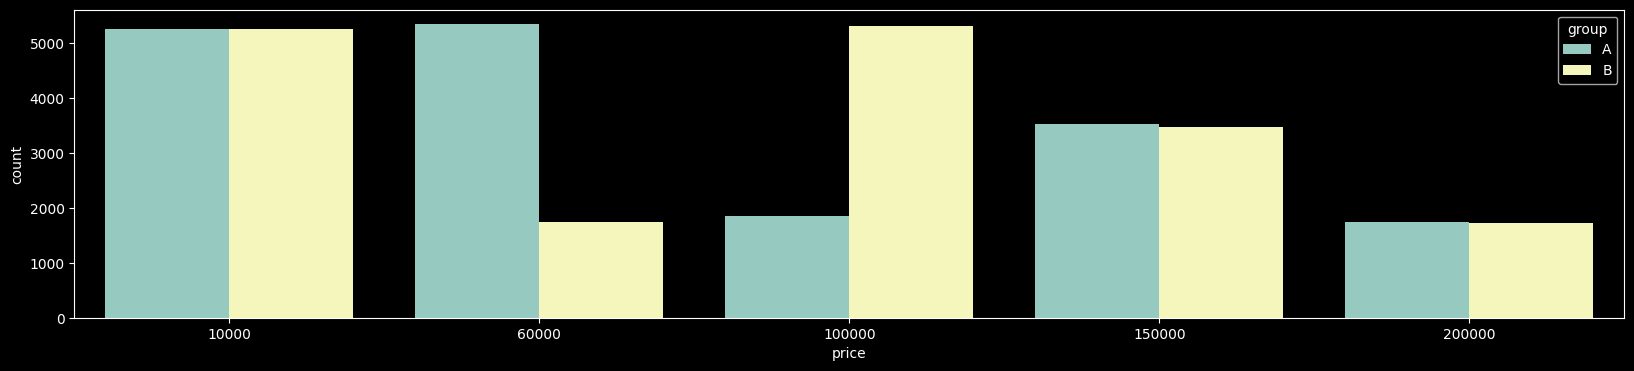

In [386]:
fig,ax = plt.subplots(figsize=(20,4))
sns.countplot(data=ab_data[ab_data['price']!=0],x='price',hue='group')
ab_data[ab_data['price']!=0].pivot_table(columns='price',index='group',values='purchase',aggfunc='sum')


Видим, что у нас в первой группе разница в том, что преобладают покупки поездок с суммой 60 тыс., когда во второй группе показатель покупок поездок за 100 тыс. выше.

In [387]:
ab_data.head(2)

,user_id,date,group,purchase,price
0,637212,2021-01-02,B,1,100000
1,924138,2021-01-02,B,0,0


In [300]:
mask_ab = ab_data.groupby(['date','group'],as_index=False
                )[['user_id','purchase','price']].agg(
                    {'user_id':'count','purchase':'sum','price':'sum'}
                ).rename(columns={'user_id':'count','purchase':'sum_purchase','price':'sum_price'})
mask_ab['cumsum_count'] = mask_ab.groupby(['group'])['count'].cumsum()
mask_ab['cumsum_purchase'] = mask_ab.groupby(['group'])['sum_purchase'].cumsum()
mask_ab['cumsum_price'] = mask_ab.groupby(['group'])['sum_price'].cumsum()

mask_ab

,date,group,count,sum_purchase,sum_price,cumsum_count,cumsum_purchase,cumsum_price
0,2021-01-02,A,2894,362,29720000,2894,362,29720000
1,2021-01-02,B,2889,348,29920000,2889,348,29920000
2,2021-01-03,A,6684,760,62640000,9578,1122,92360000
3,2021-01-03,B,6710,762,66540000,9599,1110,96460000
4,2021-01-04,A,6655,810,64970000,16233,1932,157330000
5,2021-01-04,B,6629,773,69050000,16228,1883,165510000
6,2021-01-05,A,6538,801,65710000,22771,2733,223040000
7,2021-01-05,B,6586,758,64610000,22814,2641,230120000
8,2021-01-06,A,6684,778,64440000,29455,3511,287480000
9,2021-01-06,B,6844,848,76000000,29658,3489,306120000


In [299]:
mask_ab['cumsum_conversion'] = mask_ab['cumsum_purchase']/mask_ab['cumsum_count']
mask_ab['cumsum_mean_cheack'] = mask_ab['cumsum_price']/mask_ab['cumsum_purchase']
mask_ab

,date,group,count,sum_purchase,sum_price,cumsum_count,cumsum_purchase,cumsum_price,cumsum_conversion,cumsum_mean_cheack
0,2021-01-02,A,2894,362,29720000,2894,362,29720000,0.125086,82099.447514
1,2021-01-02,B,2889,348,29920000,2889,348,29920000,0.120457,85977.011494
2,2021-01-03,A,6684,760,62640000,9578,1122,92360000,0.117143,82317.290553
3,2021-01-03,B,6710,762,66540000,9599,1110,96460000,0.115637,86900.900901
4,2021-01-04,A,6655,810,64970000,16233,1932,157330000,0.119017,81433.747412
5,2021-01-04,B,6629,773,69050000,16228,1883,165510000,0.116034,87896.972916
6,2021-01-05,A,6538,801,65710000,22771,2733,223040000,0.120021,81609.952433
7,2021-01-05,B,6586,758,64610000,22814,2641,230120000,0.115762,87133.661492
8,2021-01-06,A,6684,778,64440000,29455,3511,287480000,0.119199,81879.806323
9,2021-01-06,B,6844,848,76000000,29658,3489,306120000,0.117641,87738.607051


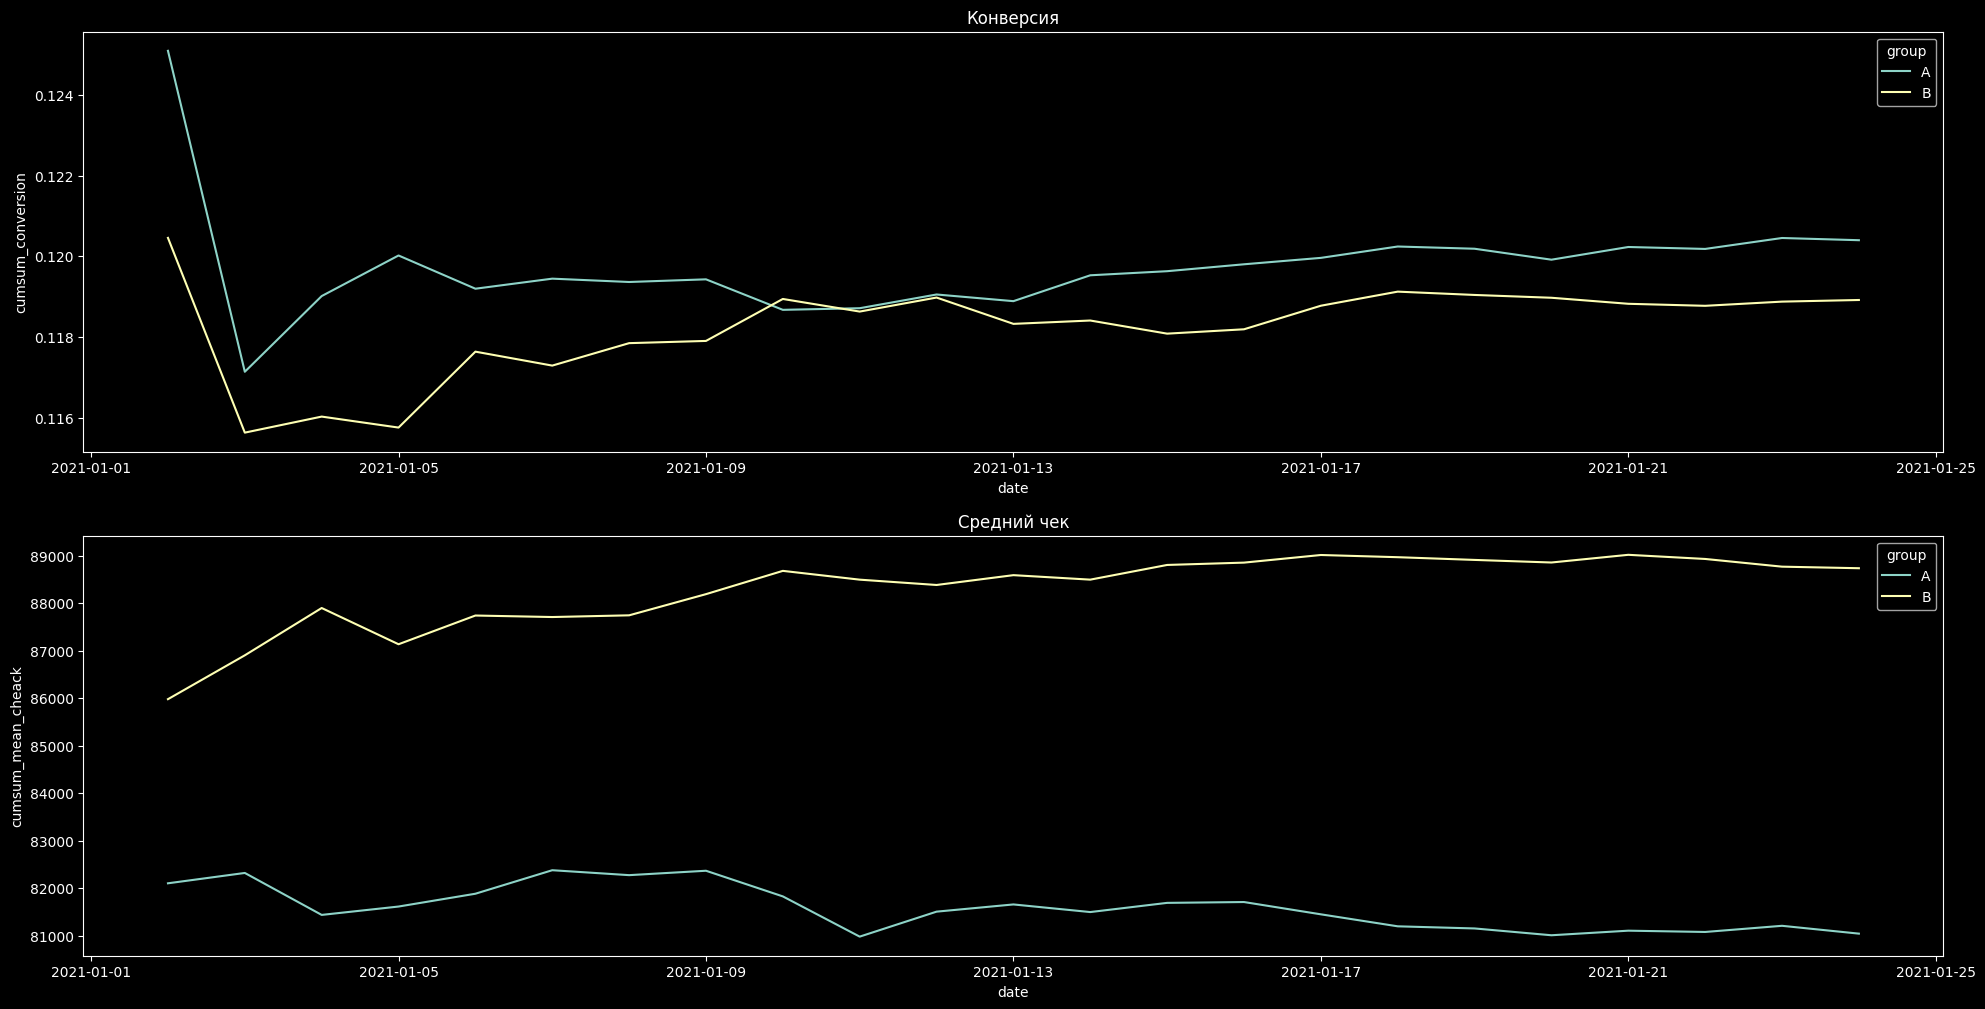

In [231]:
fig,ax = plt.subplots(2,1,figsize=(24,12))
sns.lineplot(data=mask_ab,x='date',y='cumsum_conversion',hue='group',ax=ax[0])
sns.lineplot(data=mask_ab,x='date',y='cumsum_mean_cheack',hue='group',ax=ax[1]);
ax[0].set_title('Конверсия')
ax[1].set_title('Средний чек');

По графикам комулятивных показателей мы видим, что данный тест можно назвать завершенным, т.к. метрики стабилизированы. Так же видим, что конверсия чуть выше у первой группы, но вот средний чек, тут показатель второй группы находится уверенно вверху.

Итак, воспользуемся Z-тестом для пропорции.
Нулевая гипотеза H0: Pa>=Pb
Альтернативная гипотеза H1: Pa<Pb
Для нашего эксперемента необходимо знать:
Количество успехов.
Количество участников.
Вид альтернативной гипотезы.

In [249]:
mask_z_test = ab_data.groupby('group')['purchase'].agg(['sum','count'])

In [256]:
from statsmodels.stats.proportion import proportions_ztest

_, p_value = proportions_ztest(count=mask_z_test['sum'],
                                nobs=mask_z_test['count']
                                )

alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")


p-value:  0.216
У нас нет оснований отвергнуть нулевую гипотезу


Тест показал, что нет статистической разницы между двумя конверсиями. Получается, что в обоих случаях конверсия будет одиннаковая. Осталось выяснить, есть ли разница в среднем чеке.

Проверяем вторую гипотезу. А есть ли статистическая разница между показателями среднего чека.
Нулевая гипотеза будет звучать, что нет никакой статистической разницы, между этими показателями.
Альтернативная будет означать, что есть.

H0 : Pa>=Pb
H1 : Pa<Pb

In [ ]:
ab_data.groupby(['date','group'])['price']

,user_id,date,group,purchase,price
0,637212,2021-01-02,B,1,100000
1,924138,2021-01-02,B,0,0
2,659091,2021-01-02,A,0,0
3,653194,2021-01-02,B,0,0
4,810044,2021-01-02,A,0,0
...,...,...,...,...,...
294473,907259,2021-01-24,A,1,60000
294474,820211,2021-01-24,A,0,0
294475,694025,2021-01-24,B,0,0
294476,763379,2021-01-24,B,0,0


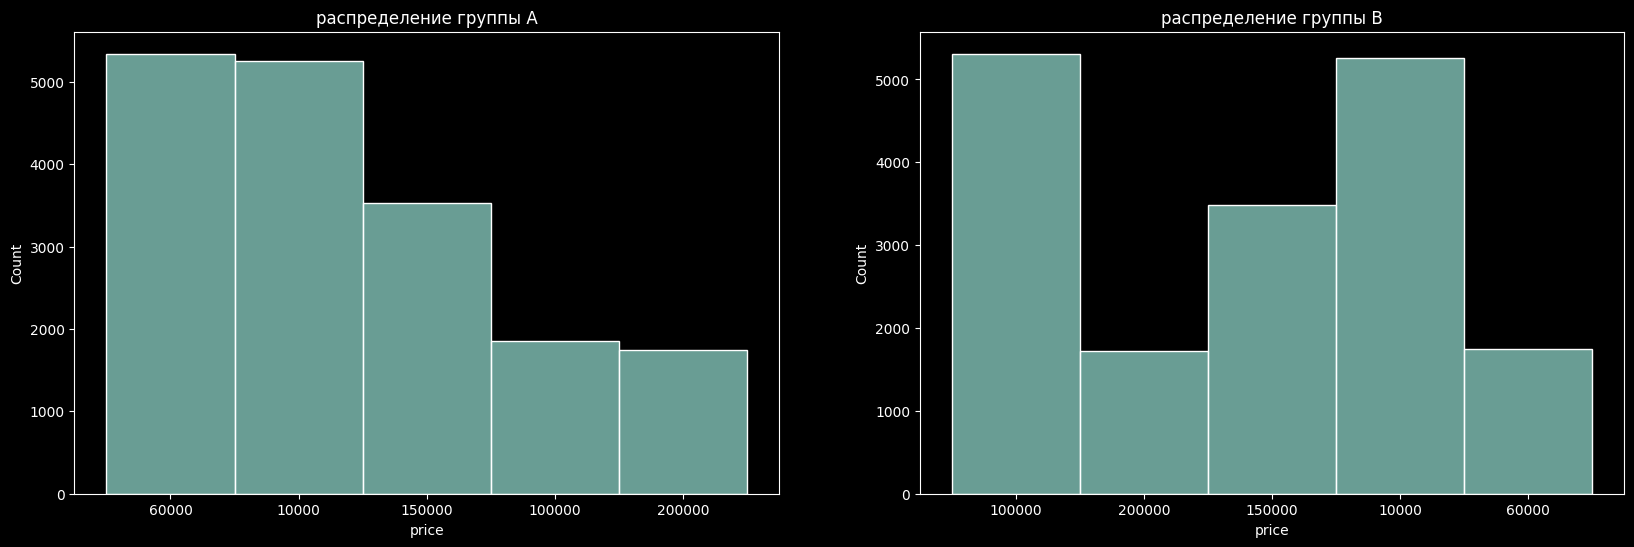

In [286]:
hist_A = ab_data[(ab_data['group']=='A')&(ab_data['price']!=0)]['price'].apply(lambda x: str(x)).reset_index()
hist_B = ab_data[(ab_data['group']=='B')&(ab_data['price']!=0)]['price'].apply(lambda x: str(x)).reset_index()
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.histplot(x='price',data=hist_A,ax=ax[0])
sns.histplot(x='price',data=hist_B,ax=ax[1]);
ax[0].set_title('распределение группы А')
ax[1].set_title('распределение группы B');

Проверим данные на нормальность, т.к. по графикам этого сказать нельзя. Воспользуемся формулой Шапиро-Уилки

In [292]:
hist_A = ab_data[(ab_data['group']=='A')&(ab_data['price']!=0)]['price']
hist_B = ab_data[(ab_data['group']=='B')&(ab_data['price']!=0)]['price']
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = shapiro(hist_A)
shapiro_result_b = shapiro(hist_B)
print('p-value группы А', round(shapiro_result_a.pvalue, 3))
print('p-value группы B', round(shapiro_result_b.pvalue, 3))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе B является нормальным")

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального


/home/roman/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17723.
  res = hypotest_fun_out(*samples, **kwds)
/home/roman/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17514.
  res = hypotest_fun_out(*samples, **kwds)
